In [13]:
import BenchmarkTools: @btime, @benchmark;

import Pkg: activate, build
activate("../GSHEIntegrator/.")
import GSHEIntegrator;

using Plots
using NPZ

  Activating project at `~/Projects/birefringence/GSHEIntegrator`


In [3]:
geometry = GSHEIntegrator.setup_geometry(
    rsource=8, θsource=π/2, ϕsource=0,
    robs=50, θobs=0.4π, ϕobs=π,
    a=0.8)

ϵs = (10).^LinRange(-3, -0.5, 30)

geometry.ode_options.no_loops = false
geometry.ode_options.Δθ = 0.000
geometry.ode_options.horizon_tol = 1.001
geometry.ode_options.maxiters = 30000

function spherical_to_shadow(X)
    ψ, ρ = X
    k3 = cos(ψ)
    k2 = sin(ψ) * sin(ρ)
    return [k2, k3]
end

spherical_to_shadow (generic function with 1 method)

In [4]:
Xgeo = GSHEIntegrator.find_geodesic_minima(geometry, 2)

2×4 Matrix{Float64}:
 1.93942  2.37865  69.5056  1.13137
 1.30968  4.03923  64.7761  1.13137

In [5]:
Xgshe = GSHEIntegrator.solve_gshe(Xgeo, geometry, ϵs);

n=1, 3.33%, ϵ=1.00e-03
n=1, 6.67%, ϵ=1.22e-03
n=1, 10.00%, ϵ=1.49e-03
n=1, 13.33%, ϵ=1.81e-03
n=1, 16.67%, ϵ=2.21e-03
n=1, 20.00%, ϵ=2.70e-03
n=1, 23.33%, ϵ=3.29e-03
n=1, 26.67%, ϵ=4.01e-03
n=1, 30.00%, ϵ=4.89e-03
n=1, 33.33%, ϵ=5.97e-03
n=1, 36.67%, ϵ=7.28e-03
n=1, 40.00%, ϵ=8.88e-03
n=1, 43.33%, ϵ=1.08e-02
n=1, 46.67%, ϵ=1.32e-02
n=1, 50.00%, ϵ=1.61e-02
n=1, 53.33%, ϵ=1.96e-02
n=1, 56.67%, ϵ=2.40e-02
n=1, 60.00%, ϵ=2.92e-02
n=1, 63.33%, ϵ=3.56e-02
n=1, 66.67%, ϵ=4.34e-02
n=1, 70.00%, ϵ=5.30e-02
n=1, 73.33%, ϵ=6.46e-02
n=1, 76.67%, ϵ=7.88e-02
n=1, 80.00%, ϵ=9.61e-02
n=1, 83.33%, ϵ=1.17e-01
n=1, 86.67%, ϵ=1.43e-01
n=1, 90.00%, ϵ=1.74e-01
n=1, 93.33%, ϵ=2.13e-01
n=1, 96.67%, ϵ=2.59e-01
n=1, 100.00%, ϵ=3.16e-01
n=2, 3.33%, ϵ=1.00e-03
n=2, 6.67%, ϵ=1.22e-03
n=2, 10.00%, ϵ=1.49e-03
n=2, 13.33%, ϵ=1.81e-03
n=2, 16.67%, ϵ=2.21e-03
n=2, 20.00%, ϵ=2.70e-03
n=2, 23.33%, ϵ=3.29e-03
n=2, 26.67%, ϵ=4.01e-03
n=2, 30.00%, ϵ=4.89e-03
n=2, 33.33%, ϵ=5.97e-03
n=2, 36.67%, ϵ=7.28e-03
n=2, 40.00%, ϵ=8.88

In [19]:
geometry.direction_coords = :shadow
N = 2500
# θs = reverse(acos.(LinRange(-1, 1, N)))
# θs = Vector(LinRange(0, π, N))
# ϕs = Vector(LinRange(0, 2π, N))
k2 = LinRange(-1, 1, N)
k3 = LinRange(-1, 1, N)
loss = GSHEIntegrator.setup_geodesic_loss(geometry);
Z = GSHEIntegrator.grid_evaluate(loss, k2, k3);

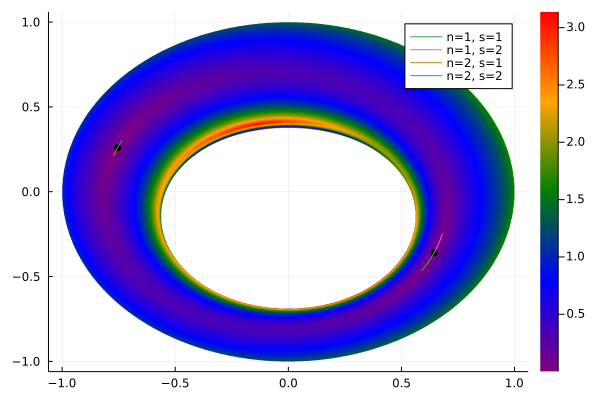

In [25]:

fig = Plots.heatmap(k2, k3, Z, c=:rainbow, dpi=600)

X = mapslices(spherical_to_shadow, Xgeo[:, 1:2], dims=2)
Plots.scatter!(fig, X[:, 1], X[:, 2], c=:black, label=nothing)

for n in 1:2, s in 1:2
    X = mapslices(spherical_to_shadow, Xgshe[n, s, :, 1:2], dims=2)
    Plots.plot!(fig,  X[:, 1], X[:, 2], label="n=$n, s=$s")
end

# Plots.savefig(fig, "~/Downloads/shadow.png")
display(fig)

In [31]:
runID = "02"
coords = zeros(N, 2)
coords[:, 1] = k2
coords[:, 2] = k3



npzwrite("/Users/richard/Projects/birefringence/data/$(runID)_dataZ.npy", Z)
npzwrite("/Users/richard/Projects/birefringence/data/$(runID)_dataCoords.npy", coords)
npzwrite("/Users/richard/Projects/birefringence/data/$(runID)_Xgeo.npy", Xgeo)
npzwrite("/Users/richard/Projects/birefringence/data/$(runID)_Xgshe.npy", Xgshe)
open("/Users/richard/Projects/birefringence/data/$(runID)Description.txt", "w") do f
    write(f, "rsource=8, thetasource=0.5pi, phisource=0, robs=50, thetaobs=0.4pi, phiobs=pi, a=0.8")
end

84